In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('grayscale')
from scipy import stats
from scipy.optimize import curve_fit
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# prep for double exponential fits
def single_exp(x, a, b):
    return a * np.exp(b * x)
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10 

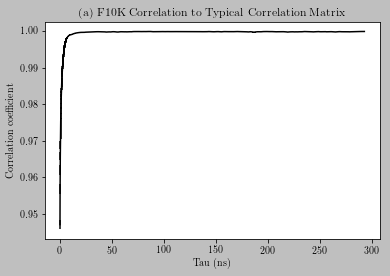

In [4]:
plt.style.use('grayscale')
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title(r'(a) F10K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('F10K_max_correlation_to_equaltime.png')

In [5]:
np.polyfit(np.log(taus), average_to_max, 1)

array([ 0.00123449,  0.99384249])

Bars are standard error

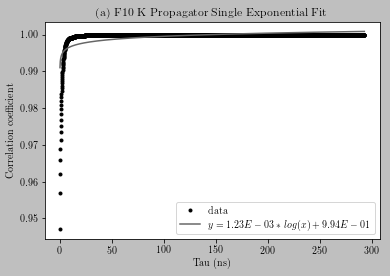

In [4]:
fit=np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.00123449*log(x) + 0.99384249
yhat = 0.00123449*np.log(taus) + 0.993842
plt.style.use('grayscale')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['data', '$y = {0:1.2E}*log(x) + {1:1.2E}$'.format(fit[0], fit[1])])
plt.title('(a) F10 K Propagator Single Exponential Fit' )
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('FIT_F10K_prop_max_correlation_to_equaltime.png')

$$y = 0.00123449*log(x) + 0.99384249$$

[ -4.50600565e-02  -6.30195285e-01   9.99734843e-01   8.46650570e-07]


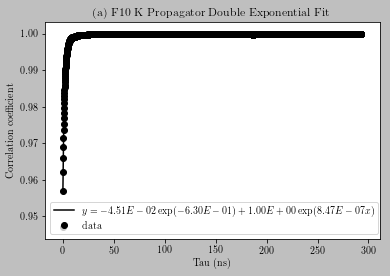

In [6]:
plt.style.use('grayscale')
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(1,0.001,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x)$".format(popt[0],popt[1], popt[2], popt[3]))
plt.scatter(taus,average_to_max,label='data')
plt.legend(loc='best')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title('(a) F10 K Propagator Double Exponential Fit')
plt.savefig('doubleFIT_F10K_prop_max_correlation_to_equaltime.png')

$$y = -4.50600565\times10^{-2} e^{-6.30195285\times10^{-1}x} + 9.99734843\times10^{-1} e^{8.46650570\times10^{-7}x}$$

[ -4.51807250e-02  -6.45117103e-01  -3.99926146e+00   1.88498607e-04
   4.99877583e+00   1.51810616e-04]


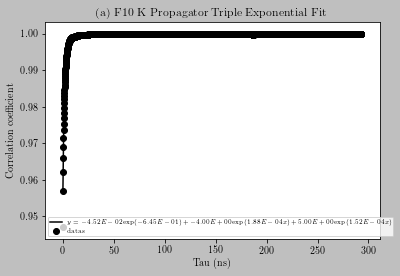

In [7]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(-.045,-.63,.1,.00000085,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.style.use('grayscale')
plt.plot(taus, curvey, label="$y = {0:1.2E} \exp({1:1.2E}) + {2:1.2E} \exp({3:1.2E}x) + {4:1.2E} \exp({5:1.2E}x)$".format(
        popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]))
plt.scatter(taus,average_to_max, label='datas')
plt.legend(loc='best', fontsize=6)
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.title("(a) F10 K Propagator Triple Exponential Fit")
plt.savefig('tripleFIT_F10K_prop_max_correlation_to_equaltime.png')

$$y = -4.51807250\times10^{-2} e^{-6.45117103\times10^{-1}x} + -3.99926146 e^{1.88498607\times10^{-4}x} + 4.99877583 e^{1.51810616\times10^{-4}}$$

# Time lagged

In [8]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

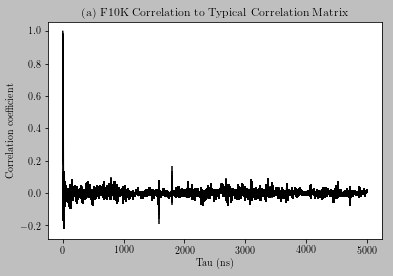

In [10]:
plt.style.use('grayscale')
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('(a) F10K Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('F10K_TL_correlation_to_equaltime.png')

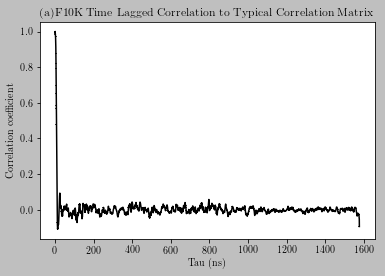

In [11]:
TLaverage_to_min = TLaverage[0:np.argmin(TLaverage)]
TLsem_to_min = sem[0:np.argmin(TLaverage)]
# Adjust the following line for each system to make everything ns.
TLtaus_min = np.arange(1,np.argmin(TLaverage)+1)/10 
plt.style.use('grayscale')
plt.errorbar(TLtaus_min, TLaverage_to_min, TLsem_to_min)
plt.title('(a)F10K Time Lagged Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('F10K_TLmin_correlation_to_equaltime.png')

This is actually hitting 0 and negatives, so an exponential or log fit ends up with NaNs.